#### Any pretrained model consist of two parts:-
#### Part 1 : feature extractor layers
#### Part 2 : classifier layers
###### Refrence book : deep_learning_for_computer_vision by Jason Brownlee

### Three application can be used with Transfer Learning:-
#### 1: direct classification
#### 2: feature extractor preprocessor : extracted features of a photograph
#### 3: feature extractor in Model : adding new layers to the model

### Transfer learning type 1 : using model for classification p.197

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16

In [3]:
model = VGG16()

In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
from tensorflow.keras.preprocessing import image

In [7]:
img = image.load_img('cat1.png',target_size=(224,224))

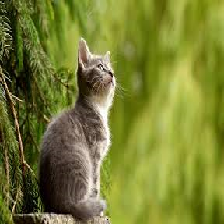

In [8]:
img

In [9]:
# convert image to array
x = image.img_to_array(img)

In [10]:
x.shape

(224, 224, 3)

In [11]:
# convert image array into tensor 
# method 1: reshape method -> DL book
y = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))

In [12]:
y.shape

(1, 224, 224, 3)

In [13]:
import numpy as np

In [14]:
# method 2 : expand function -> https://github.com/fchollet/deep-learning-models
z = np.expand_dims(x, axis=0)

In [15]:
z.shape

(1, 224, 224, 3)

In [16]:
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions


In [17]:
pred = preprocess_input(y)

In [18]:
inference = model.predict(pred)

In [19]:
print('the predicted picture is {}'.format(decode_predictions(inference)))

the predicted picture is [[('n02497673', 'Madagascar_cat', 0.5997375), ('n02127052', 'lynx', 0.11562817), ('n01877812', 'wallaby', 0.06492738), ('n02123159', 'tiger_cat', 0.06470282), ('n02124075', 'Egyptian_cat', 0.043529574)]]


In [20]:
os_img = image.load_img('os.png',target_size=(224,224))
os_array = image.img_to_array(os_img)
#os_array = np.resize(os_array,(224,224, 3))
os_array = os_array.reshape((1,224,224, 3))
# input should be reshape to (batch size, h,w,c)

In [22]:
#os_img_dim = np.expand_dims(os_img,axis = 0)
# input should be reshape to (batch size, h,w,c)

In [23]:
os_preprocess = preprocess_input(os_array)

In [24]:
os_inference = model.predict(os_preprocess)

In [25]:
print('the predicted picture is {}'.format(decode_predictions(os_inference)))

the predicted picture is [[('n03630383', 'lab_coat', 0.17439142), ('n04532106', 'vestment', 0.09096045), ('n02869837', 'bonnet', 0.079442814), ('n03045698', 'cloak', 0.071636714), ('n02791270', 'barbershop', 0.036513835)]]


### Transfer learning type 2 : as Feature Extractor Preprocessor p.198


In [26]:
from tensorflow.keras.models import Model

In [27]:
model_2 = VGG16() # if using VGG16(include_top=False, input_shape=(300, 300, 3)) 
                  #all classifier part will deleted

In [28]:
model_2._layers.pop()
model_2 = Model(inputs=model_2.inputs, outputs=model_2.layers[-1].output)

In [29]:
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [30]:
features = model_2.predict(os_preprocess)
print(features.shape)


(1, 4096)


### Transfer learning type 3: feature extractor in Model: adding new layers 200

#### Method 1

In [31]:
## to load model without classifier layers part -> include_top=False
model_3 = VGG16(include_top = False,input_shape = (256,256,3))

In [32]:
model_3.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [33]:
from tensorflow.keras.layers import Flatten,Dense

In [34]:
last_layer = model_3.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 8, 8, 512)


فكرة الطريقة اخذ اسم اخر طبقة ثم اسنادها الى الدالة
output

In [35]:
last_output

<tf.Tensor 'block5_pool_2/Identity:0' shape=(None, 8, 8, 512) dtype=float32>

In [36]:
## adding classifier layers part
flat1 = Flatten()(last_output)
class1 = Dense(5120, activation='relu')(flat1)
class2 = Dense(1024, activation='relu')(class1)
output = Dense(3, activation='softmax')(class2)
# define new model -> inputs: 1st layer in feature extraction,outputs-> last layer in classifiers
model_3 = Model(inputs=model_3.inputs, outputs=output)

In [37]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

### method 2

In [38]:
model_4 = VGG16(include_top = False,input_shape = (224,224,3))

In [39]:
model_4.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [40]:
print(type(model_4.output))
print(type(model_4.outputs))

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'list'>


In [41]:
print(type(model_4.input))
print(type(model_4.inputs))

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'list'>


In [42]:
last_layer = model_4.output # get last layer better than method 1 above
flat1 = Flatten()(last_layer)
class1 = Dense(5120,activation='relu')(flat1)
class2 = Dense(1024,activation='relu')(class1)
output = Dense(3,activation = 'softmax')(class2)
model_41 = Model(inputs = model_4.input,outputs = output)


In [43]:
model_41.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [44]:
# only if we want to freeze layers feature extraction 
for layer in model_4.layers:
    layer.trainable = False

In [45]:
model_5 = VGG16()

In [46]:
model_5._layers.pop()
model_5 = Model(inputs=model_5.input, outputs=model_5.layers[-2].output)
# مابداخل القوس لتحديد عدد الطبقات من الاخير لازالتها

In [47]:
model_5.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [48]:
from tensorflow.keras.applications.resnet50 import ResNet50,decode_predictions,preprocess_input

In [49]:
res_model = ResNet50()

102973440/102967424 [==============================] - 16s 0us/step


In [51]:
decode_predictions(res_model.predict(os_preprocess))

[[('n02101388', 'Brittany_spaniel', 0.19273521),
  ('n01748264', 'Indian_cobra', 0.14892443),
  ('n03630383', 'lab_coat', 0.10321834),
  ('n02101556', 'clumber', 0.05232911),
  ('n02102177', 'Welsh_springer_spaniel', 0.051367413)]]

In [ ]:
decode_predictions(res_model.predict(os_preprocess))

In [55]:
decode_predictions(res_model.predict(z))

[[('n02127052', 'lynx', 0.48560238),
  ('n02124075', 'Egyptian_cat', 0.2091713),
  ('n02497673', 'Madagascar_cat', 0.06877336),
  ('n02123045', 'tabby', 0.03582771),
  ('n02123159', 'tiger_cat', 0.03222989)]]